In [2]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import sqlite3

In [3]:
conection = sqlite3.connect("amazon_sales.db")
df = pd.read_sql_query("""
                        SELECT *
                        FROM products
                        JOIN (
                            SELECT reviews.review_title,reviews.review_content, users.user_name,reviews.id_product,reviews.id_user
                            FROM reviews
                            JOIN users ON reviews.id_user = users.id
                        ) AS reviews_users ON products.id = reviews_users.id_product; 
                        """,conection)

In [58]:
df.head(2)

,id,product_name,category_1,category_2,category_3,category_4,category_5,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,img_link,product_link,review_title,review_content,user_name,id_product,id_user
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,399.0,1099.0,0.64,4.2,24269,High Compatibility : Compatible With iPhone 12...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Satisfied,Looks durable Charging is fine tooNo complains,Manav,B07JW9H4J1,AG3D6O4STAQKAY2UVGEUV46KN35Q
1,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,399.0,1099.0,0.64,4.2,24269,High Compatibility : Compatible With iPhone 12...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Charging is really fast,Charging is really fast,Adarsh gupta,B07JW9H4J1,AHMY5CWJMMK5BJRBBSNLYT3ONILA


In [5]:
df.shape

(2590, 20)

In [6]:
numeric_df = df[["discounted_price",	"actual_price",	"discount_percentage",	"rating",	"rating_count"]]

In [7]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590 entries, 0 to 2589
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   discounted_price     2590 non-null   float64
 1   actual_price         2590 non-null   float64
 2   discount_percentage  2590 non-null   float64
 3   rating               2590 non-null   float64
 4   rating_count         2590 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 101.3 KB


# Handeling Missing Values

In [8]:
df.isna().sum()

id                     0
product_name           0
category_1             0
category_2             0
category_3             0
category_4             0
category_5             0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
img_link               0
product_link           0
review_title           0
review_content         0
user_name              0
id_product             0
id_user                0
dtype: int64

# Handeling Duplicates

In [9]:
df[df.duplicated()]

,id,product_name,category_1,category_2,category_3,category_4,category_5,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,img_link,product_link,review_title,review_content,user_name,id_product,id_user


# Preguntas Interesantes 

1. ¿Cuáles son los productos más vendidos?
2. ¿Existen patrones estacionales en las ventas?
3. ¿Qué canales de marketing son más efectivos?
4. ¿Cuál es el valor promedio de un pedido?
5. ¿Qué segmentos de clientes son más rentables?

In [10]:
products = pd.read_sql_query("""
                        SELECT *
                        FROM products; 
                        """,conection)

Best Seller

In [11]:
maximum_rating = df["rating_count"].max()

best_seller = df.loc[df["rating_count"] == maximum_rating,["product_name","img_link","product_link"]]

print(best_seller["product_name"].unique(),"\n",best_seller["img_link"].unique(),"\n",best_seller["product_link"].unique())

['AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot'] 
 ['https://m.media-amazon.com/images/I/41nPYaWA+ML._SY300_SX300_.jpg'] 
 ['https://www.amazon.in/AmazonBasics-Flexible-HDMI-Cable-3-Foot/dp/B07KSMBL2H/ref=sr_1_14?qid=1672909124&s=electronics&sr=1-14']


Segmento mas rentable

In [12]:
most_profitable = pd.read_sql_query(""" 
                        SELECT category_1, category_2, category_3, category_4, category_5, SUM(actual_price) AS total_price
                        FROM products
                        GROUP BY category_1, category_2, category_3, category_4, category_5
                        ORDER BY total_price DESC
                        LIMIT 5;
                        """,conection)

In [13]:
most_profitable

,category_1,category_2,category_3,category_4,category_5,total_price
0,Home&Kitchen,Kitchen&HomeAppliances,"Vacuum,Cleaning&Ironing",Vacuums&FloorCare,Vacuums,216809.00
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,150032.66
2,Home&Kitchen,Kitchen&HomeAppliances,"Vacuum,Cleaning&Ironing","Irons,Steamers&Accessories",Irons,77977.00
3,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,DeepFatFryers,AirFryers,60584.00
4,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Kettles&HotWaterDispensers,ElectricKettles,35087.00


# Exploring Distributions

## Numerical data

In [32]:
numerical_data = df.select_dtypes(["float64","int64"])
numerical_data.drop(columns="rating",inplace=True)

In [33]:
numerical_data.head()

,discounted_price,actual_price,discount_percentage,rating_count
0,399.0,1099.0,0.64,24269
1,399.0,1099.0,0.64,24269
2,399.0,1099.0,0.64,24269
3,399.0,1099.0,0.64,24269
4,399.0,1099.0,0.64,24269


NOTA : ELIMINAR RATING ES UNA VARIABLE CATGORICA

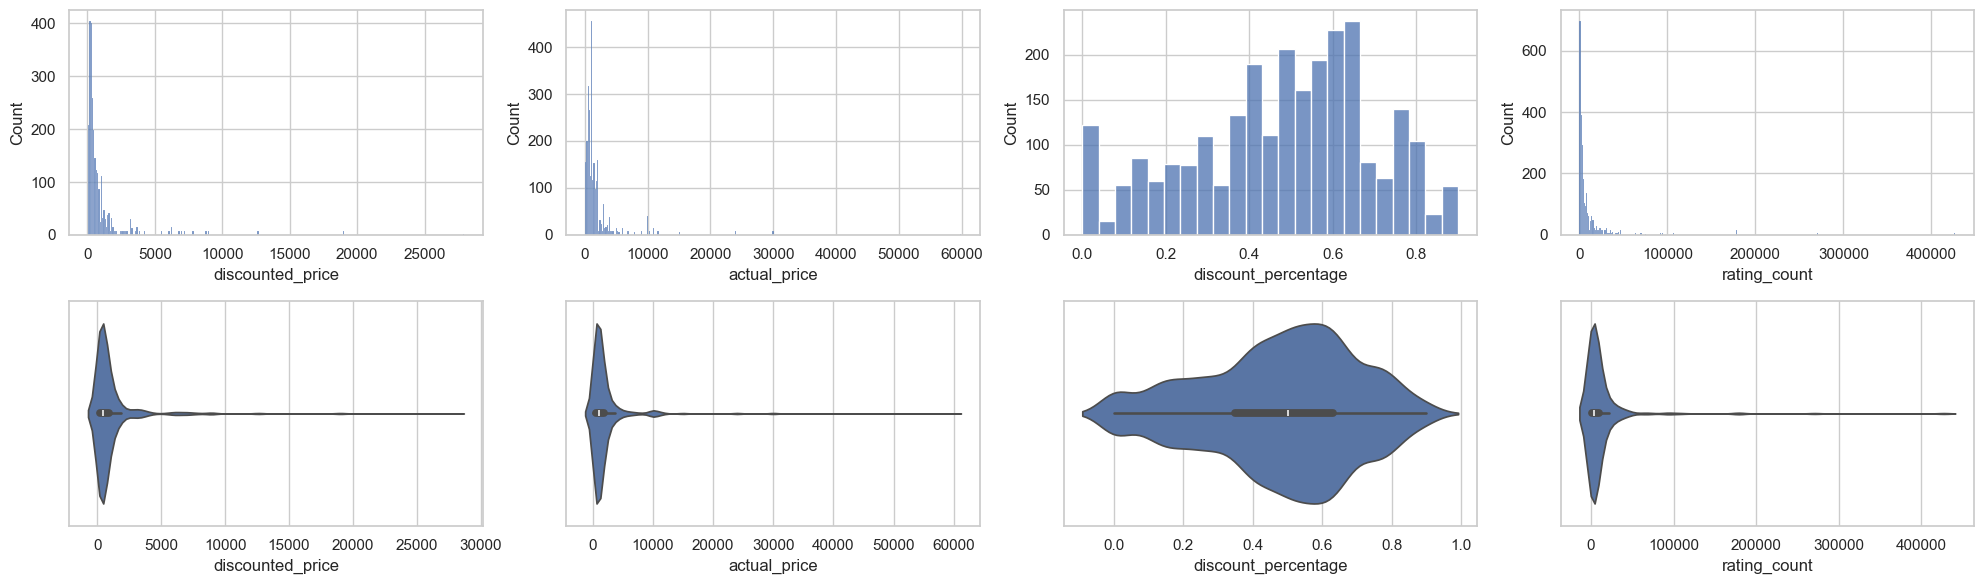

In [40]:
fig,ax = plt.subplots(nrows=2, ncols=4,figsize=(20,6))

sns.histplot(data = numerical_data["discounted_price"],ax=ax[0,0])
sns.violinplot(data = numerical_data,x=numerical_data["discounted_price"],ax=ax[1,0])

sns.histplot(data = numerical_data["actual_price"],ax=ax[0,1])
sns.violinplot(data = numerical_data, x = numerical_data["actual_price"],ax=ax[1,1])

sns.histplot(data = numerical_data["discount_percentage"],ax=ax[0,2])
sns.violinplot(data = numerical_data, x = numerical_data["discount_percentage"],ax=ax[1,2])

sns.histplot(data = numerical_data["rating_count"],ax=ax[0,3])
sns.violinplot(data = numerical_data, x = numerical_data["rating_count"],ax=ax[1,3])

plt.tight_layout()
plt.show()

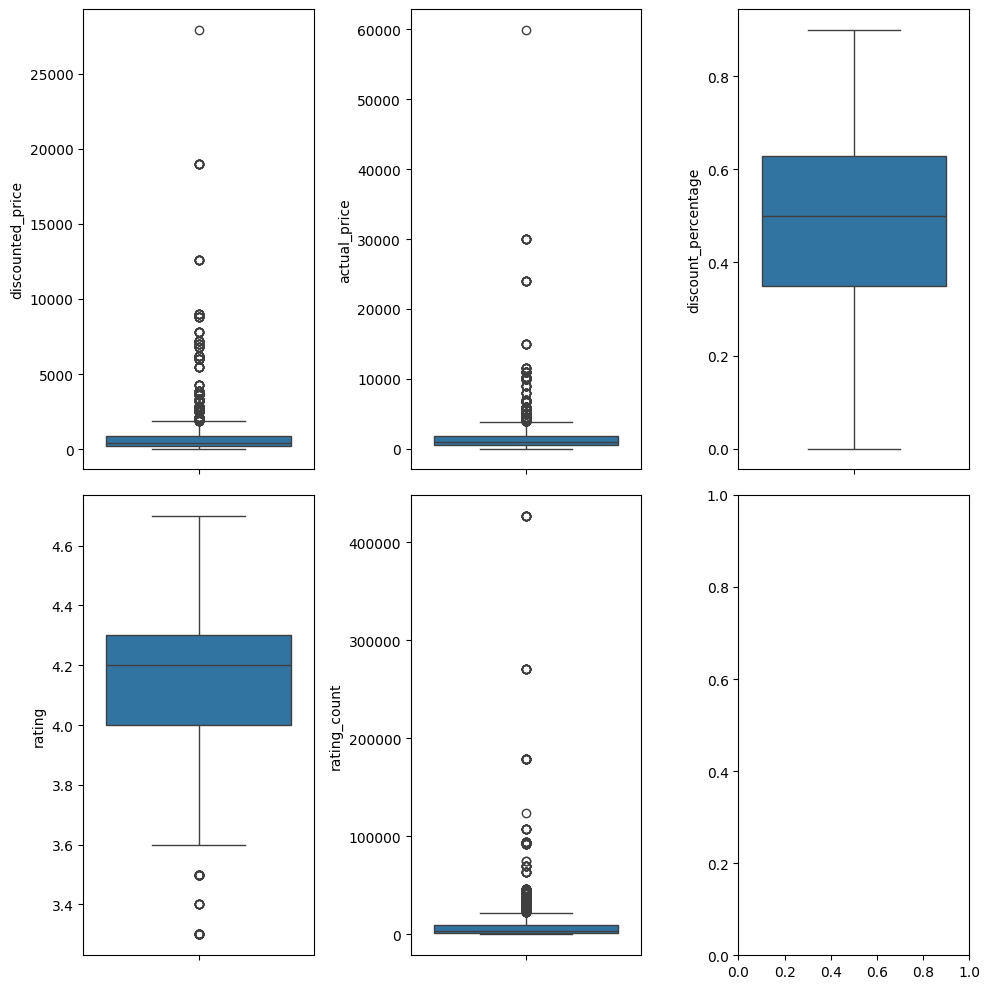

In [18]:
fig,ax = plt.subplots(nrows=2, ncols=3,figsize=(10,10))

sns.boxplot(data = numerical_data["discounted_price"],ax=ax[0,0])
sns.boxplot(data = numerical_data["actual_price"],ax=ax[0,1])
sns.boxplot(data = numerical_data["discount_percentage"],ax=ax[0,2])
sns.boxplot(data = numerical_data["rating"],ax=ax[1,0])
sns.boxplot(data = numerical_data["rating_count"],ax=ax[1,1])

plt.tight_layout()
plt.show()

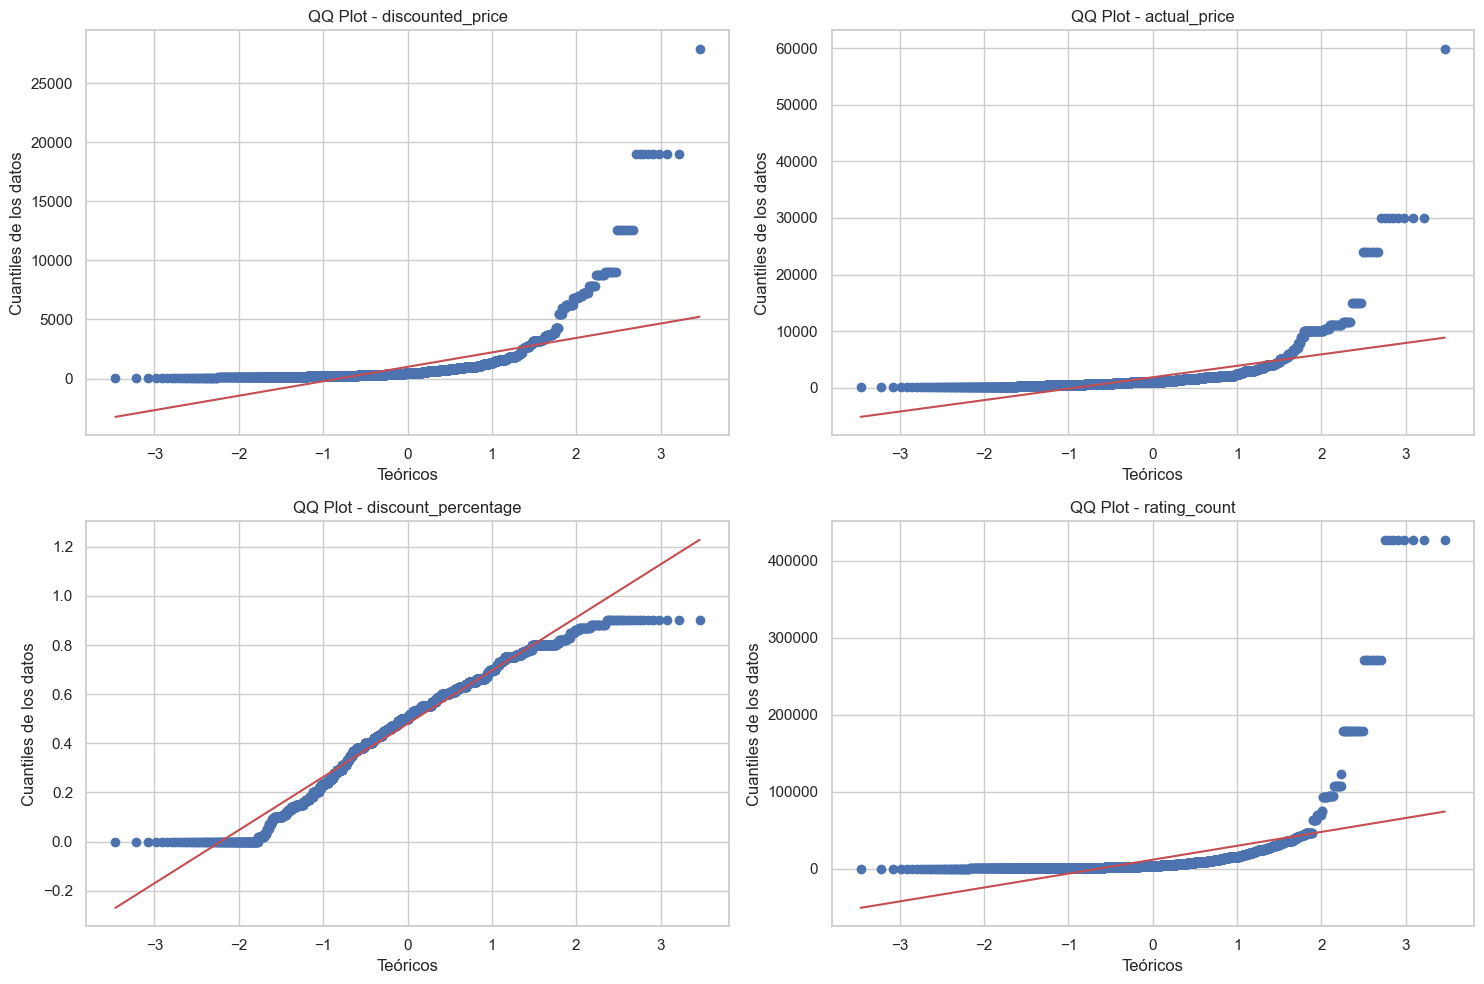

In [50]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Ejemplo de datos
numerical_data = df[["discounted_price", "actual_price", "discount_percentage", "rating_count"]]

# Configuración de la figura y subplots (2 filas, 3 columnas)
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.set(style="whitegrid")

# Listado de nombres de las columnas a graficar
columns = ["discounted_price", "actual_price", "discount_percentage", "rating_count"]

# Generación de cada QQ plot
for i, col in enumerate(columns):
    row, col_index = divmod(i, 2)  # Calcular fila y columna para el subplot
    stats.probplot(numerical_data[col].dropna(), dist="norm", plot=axs[row, col_index])
    axs[row, col_index].set_title(f"QQ Plot - {col}")
    axs[row, col_index].set_xlabel("Teóricos")
    axs[row, col_index].set_ylabel("Cuantiles de los datos")

# Ajuste para el layout
plt.tight_layout()
plt.show()


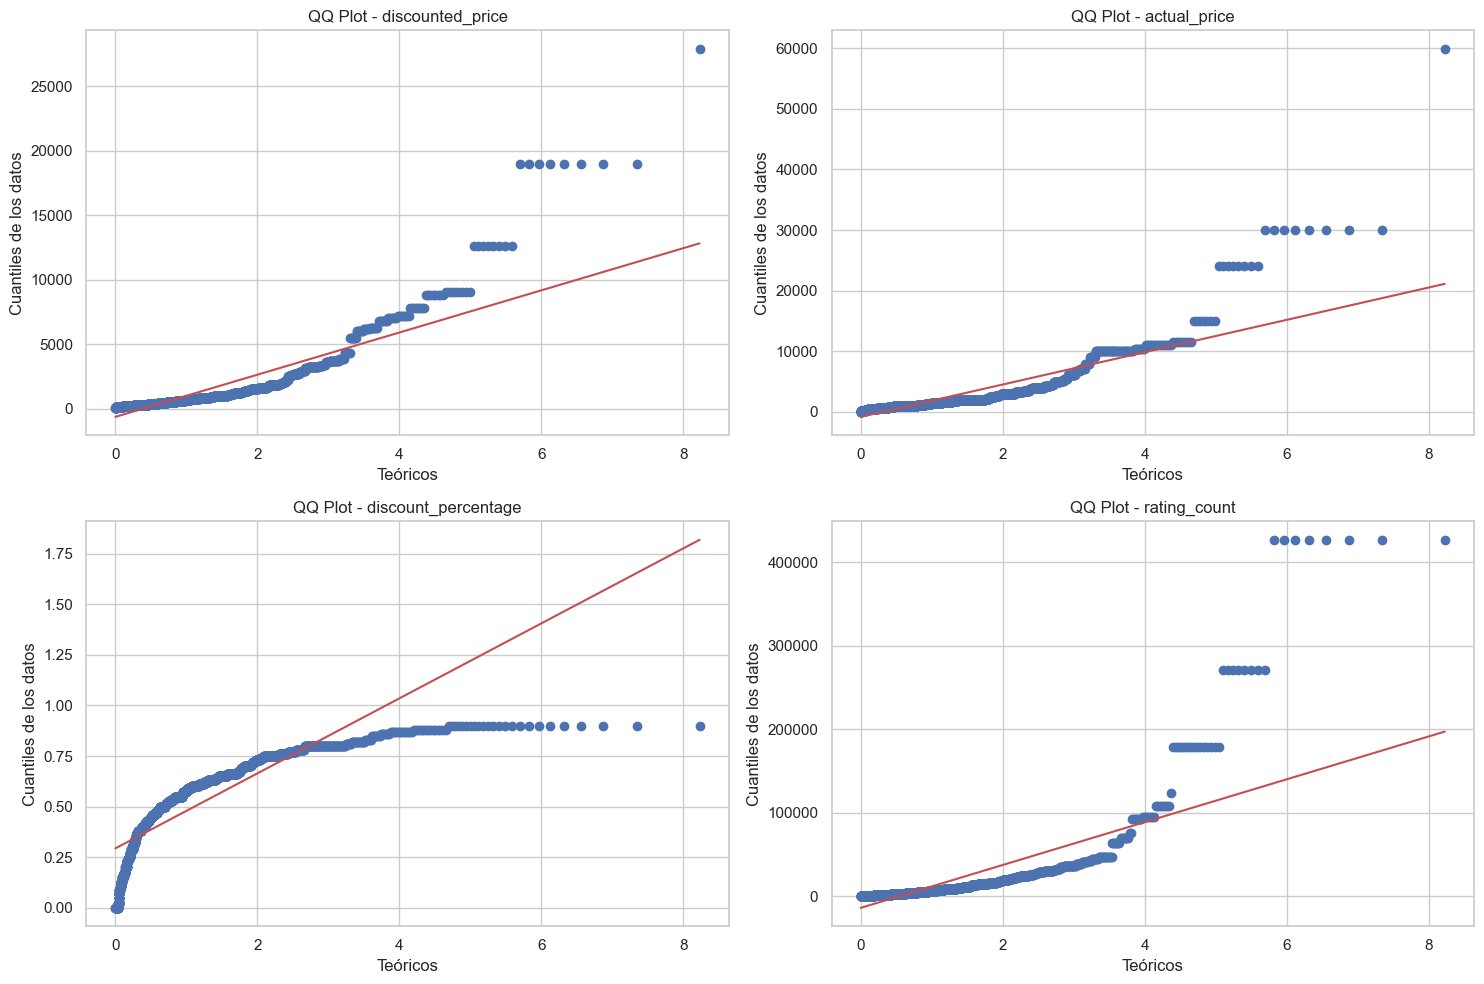

In [51]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Ejemplo de datos
numerical_data = df[["discounted_price", "actual_price", "discount_percentage", "rating_count"]]

# Configuración de la figura y subplots (2 filas, 3 columnas)
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.set(style="whitegrid")

# Listado de nombres de las columnas a graficar
columns = ["discounted_price", "actual_price", "discount_percentage", "rating_count"]

# Generación de cada QQ plot
for i, col in enumerate(columns):
    row, col_index = divmod(i, 2)  # Calcular fila y columna para el subplot
    stats.probplot(numerical_data[col].dropna(), dist="expon", plot=axs[row, col_index])
    axs[row, col_index].set_title(f"QQ Plot - {col}")
    axs[row, col_index].set_xlabel("Teóricos")
    axs[row, col_index].set_ylabel("Cuantiles de los datos")

# Ajuste para el layout
plt.tight_layout()
plt.show()


**Summary** : Gracias a los histplot y a los violin plot puede ver que aparentemente discount percentage y rating tendria una ditribucion normal cosa que con el qqplot puedo de alguna manera confirmar, en cambio gracias a los mismo graficos puedo confirmar que actual price tiene una distribucion exponenecial 

Esto puede deberse a que los descuentos tienden a no acumularse o tener valores exteremos independientemente del producto en cambio dependiendo el producto el precio puede llegar a variar seriamente es por eso que vemos esa ditribucion, naturalmente observamos comportamientos similares tanto en el precio con descuento como en la cantidad de puntajes (esto ultimo puede deberse a que a medida que la importancia del precio aumente la inercia a dejar un puntaje es menor)

## Categorical Data

In [21]:
categorical_data = df[["category_1","category_2","category_3","category_4","category_5"]]

### Categoria 1

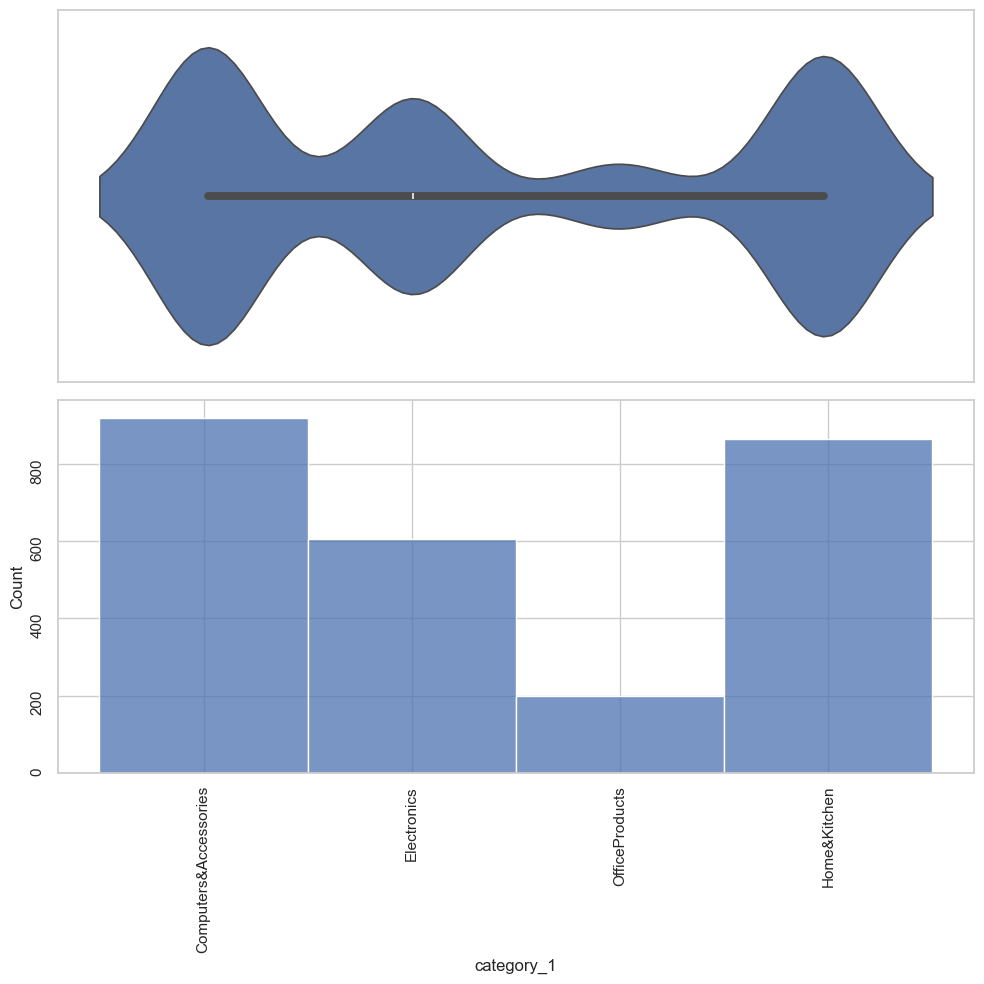

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes tu DataFrame 'categorical_data' cargado.

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Diagrama de violín
sns.violinplot(x=categorical_data["category_1"], ax=ax[0])
ax[0].set_xticks([])  # Oculta los ticks del eje x
ax[0].set_xlabel('')  # Oculta la etiqueta del eje x

# Diagrama de caja
sns.histplot(data=categorical_data["category_1"], ax=ax[1])
ax[1].tick_params(labelrotation=90)
# No ocultamos ticks y etiquetas del eje x para el último gráfico

plt.tight_layout()
plt.show()


### Ctegoria 2

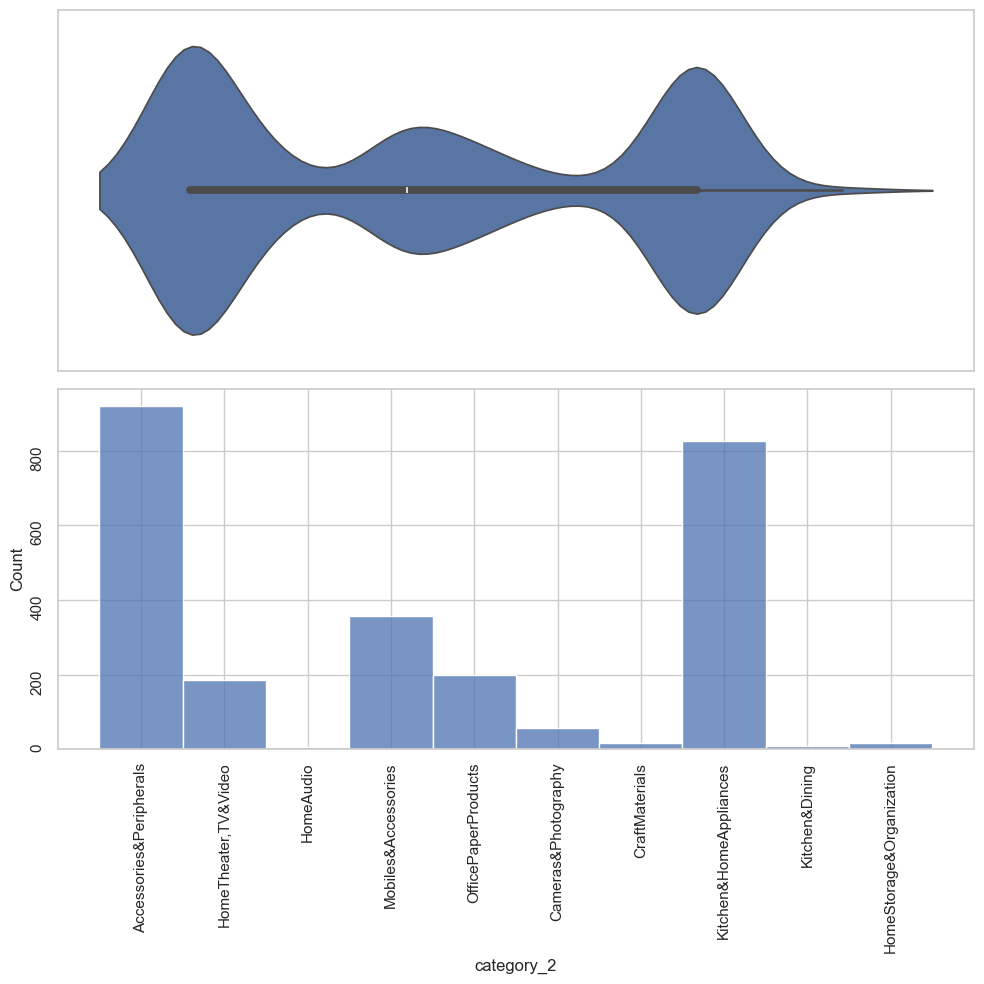

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes tu DataFrame 'categorical_data' cargado.

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Diagrama de violín
sns.violinplot(x=categorical_data["category_2"], ax=ax[0])
ax[0].set_xticks([])  # Oculta los ticks del eje x
ax[0].set_xlabel('')  # Oculta la etiqueta del eje x

# Diagrama de caja
sns.histplot(data=categorical_data["category_2"], ax=ax[1])
ax[1].tick_params(labelrotation=90)
# No ocultamos ticks y etiquetas del eje x para el último gráfico

plt.tight_layout()
plt.show()


### Categoria 3

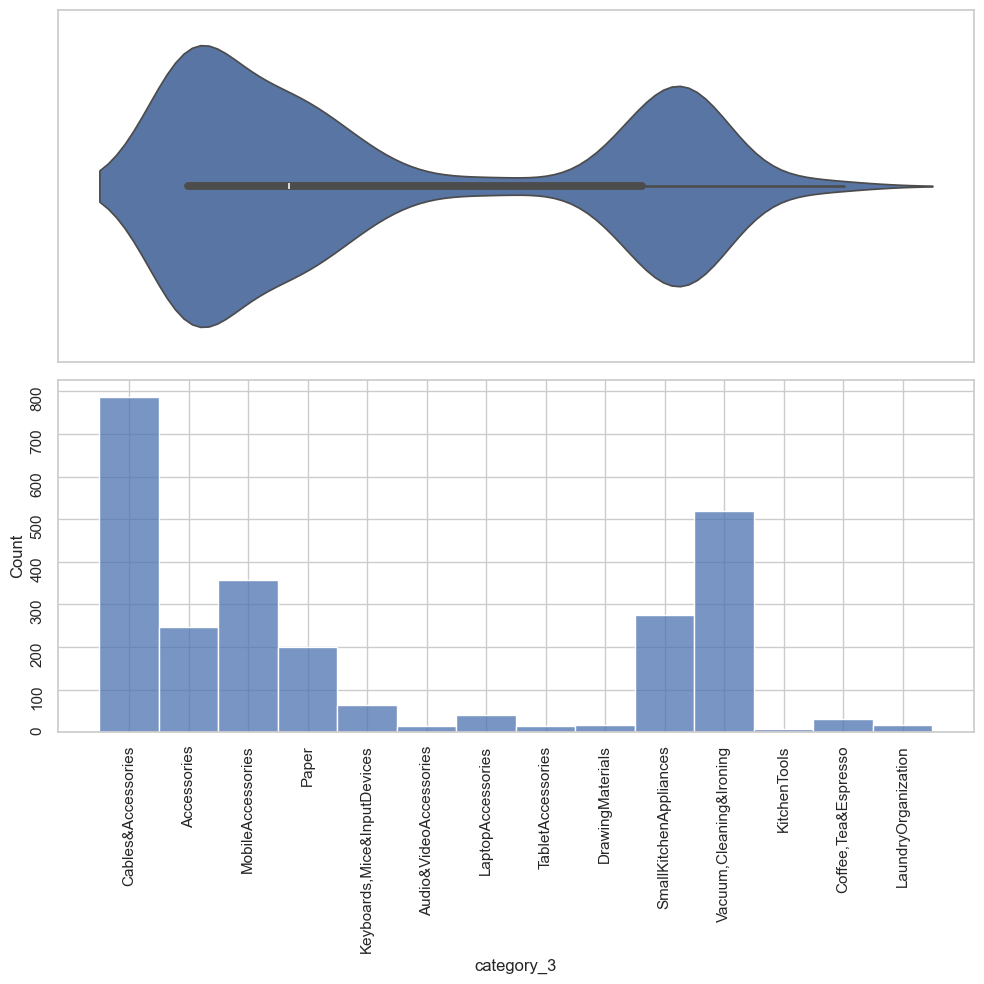

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes tu DataFrame 'categorical_data' cargado.

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Diagrama de violín
sns.violinplot(x=categorical_data["category_3"], ax=ax[0])
ax[0].set_xticks([])  # Oculta los ticks del eje x
ax[0].set_xlabel('')  # Oculta la etiqueta del eje x

# Diagrama de caja
sns.histplot(data=categorical_data["category_3"], ax=ax[1])
ax[1].tick_params(labelrotation=90)
# No ocultamos ticks y etiquetas del eje x para el último gráfico

plt.tight_layout()
plt.show()


### Categoria 4

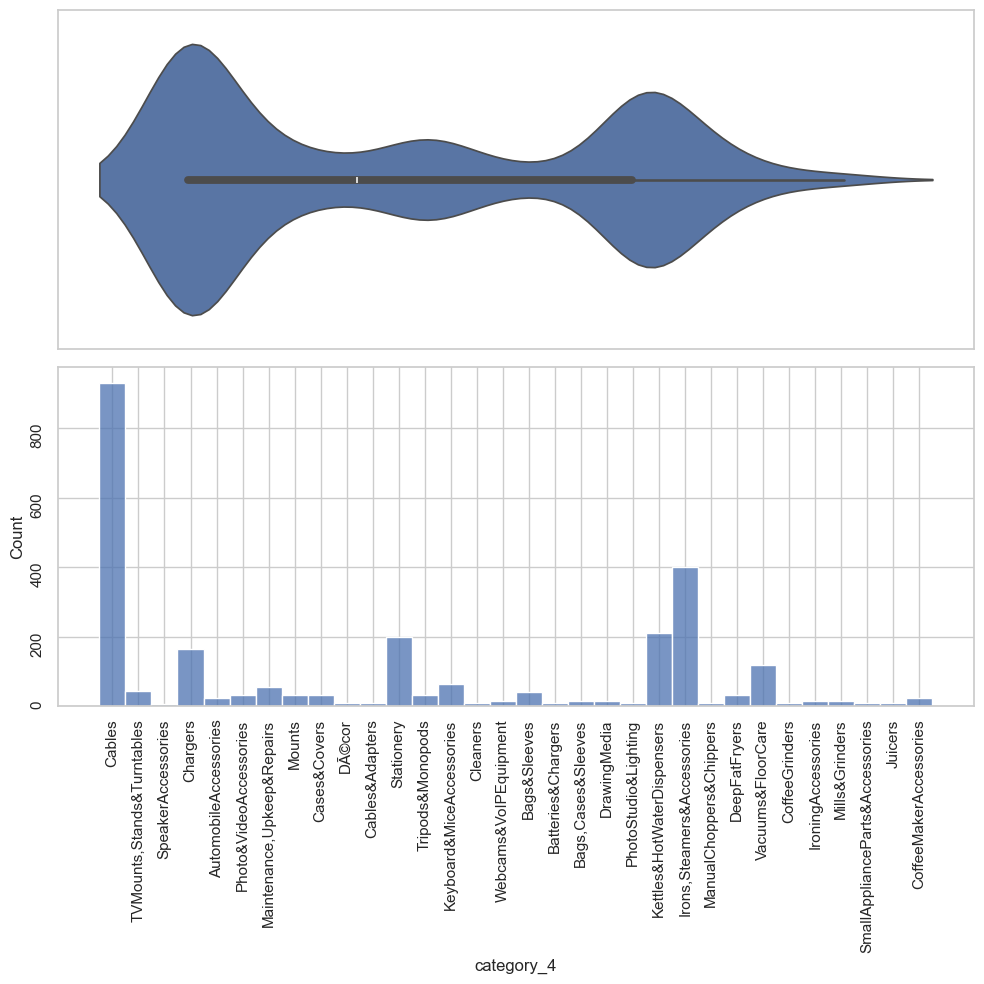

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes tu DataFrame 'categorical_data' cargado.

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Diagrama de violín
sns.violinplot(x=categorical_data["category_4"], ax=ax[0])
ax[0].set_xticks([])  # Oculta los ticks del eje x
ax[0].set_xlabel('')  # Oculta la etiqueta del eje x

# Diagrama de caja
sns.histplot(data=categorical_data["category_4"], ax=ax[1])
ax[1].tick_params(labelrotation=90)
# No ocultamos ticks y etiquetas del eje x para el último gráfico

plt.tight_layout()
plt.show()


### Categoria 5

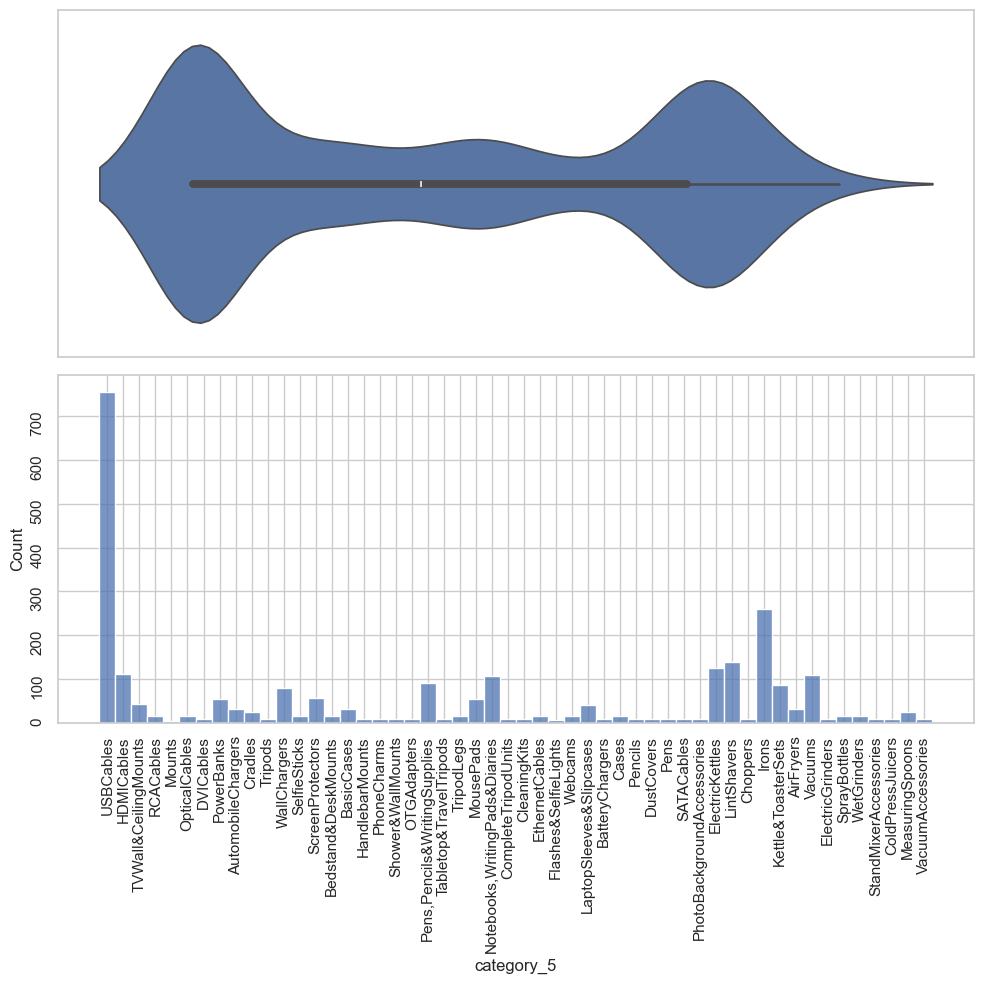

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes tu DataFrame 'categorical_data' cargado.

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Diagrama de violín
sns.violinplot(x=categorical_data["category_5"], ax=ax[0])
ax[0].set_xticks([])  # Oculta los ticks del eje x
ax[0].set_xlabel('')  # Oculta la etiqueta del eje x

# Diagrama de caja
sns.histplot(data=categorical_data["category_5"], ax=ax[1])
ax[1].tick_params(labelrotation=90)
# No ocultamos ticks y etiquetas del eje x para el último gráfico

plt.tight_layout()
plt.show()


# Exploring Compositions

In [56]:
categorical_data.head()

,category_1,category_2,category_3,category_4,category_5
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


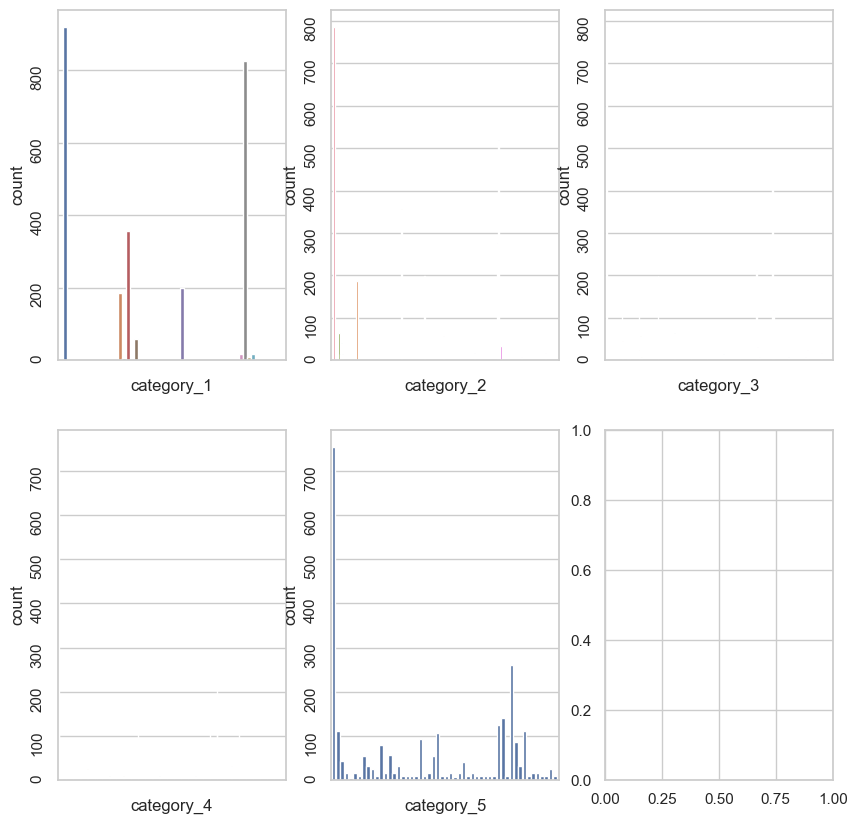

In [68]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(10,10))
g1 = sns.countplot(data=df,x="category_1", hue="category_2",ax=ax[0,0])
g1.tick_params(labelrotation=90)
g1.set_xticks("")
g1.legend().remove()

g2 = sns.countplot(data=df,x="category_2", hue="category_3",ax=ax[0,1])
g2.tick_params(labelrotation=90,)
g2.set_xticks("")
g2.legend().remove()

g3 = sns.countplot(data=df,x="category_3", hue="category_4",ax=ax[0,2])
g3.tick_params(labelrotation=90)
g3.set_xticks("")
g3.legend().remove()

g4 = sns.countplot(data=df,x="category_4", hue="category_5",ax=ax[1,0])
g4.tick_params(labelrotation=90)
g4.set_xticks("")
g4.legend().remove()

g5 = sns.countplot(data=df,x="category_5",ax=ax[1,1])
g5.tick_params(labelrotation=90)
g5.set_xticks("")
g5.legend().remove()


# Exploring Relationships

# Handeling Ouliers

### Numerical Ouliers

### Categorical Outliers

A continuacion se utilizara el z-score sobre las frecuencias para determinar cual frecuencia puede ser considerada como outlier

In [27]:
# calcula la tabla de frecuencias de cada categoria
category_1 = categorical_data["category_1"].value_counts()
category_2 = categorical_data["category_2"].value_counts()
category_3 = categorical_data["category_3"].value_counts()
category_4 = categorical_data["category_4"].value_counts()
category_5 = categorical_data["category_5"].value_counts()

In [28]:
category_1.values

array([920, 866, 605, 199], dtype=int64)

In [29]:
# calcula el zscore de la categoria
def categoric_z_score(categorie):
    mean = sum(categorie.values)/len(categorie)
    suma = 0    
    zvalues = {}
    for key,value in categorie.items():
        suma += (value-mean)**2
    
    sd = np.sqrt(suma/len(categorie))

    for key ,value in categorie.items():
        zvalues[key] = (value - mean)/sd
    return zvalues

In [30]:
category_1 = categoric_z_score(category_1)
category_2 = categoric_z_score(category_2)
category_3 = categoric_z_score(category_3)
category_4 = categoric_z_score(category_4)
category_5 = categoric_z_score(category_5)

categories = {"categoria_1":category_1,"categoria_2":category_2,"categoria_3":category_3,"categoria_4":category_4,"categoria_5":category_5}
outliers = {}
for key1,category in categories.items():
    for key2,value in category.items():
        if abs(value) > 3:
            # Si la clave ya existe en el diccionario, agregamos el valor a la lista
            if key1 in outliers:
                outliers[key1].append(key2)
            # Si la clave no existe, creamos una nueva lista con el valor
            else:
                outliers[key1] = [key2]

for key,value in outliers.items():
    print(f"{key} : {value}\n\n")

categoria_4 : ['Cables']


categoria_5 : ['USBCables']




**Summary**: Observo que existen solamente 2 ouliers que perteneces a la categoria 4 y la 5 

# Notas

**Análisis Descriptivo y Distribución de Precios**

**Distribución de Precios**
* Examina la distribución de `actual_price` y `discounted_price`. Podrías usar histogramas o KDE plots para observar cómo se distribuyen y detectar posibles outliers.

**Descuento Aplicado**
* Revisa la variable `discount_percentage` para ver si hay patrones, como si ciertos productos o categorías tienen mayores descuentos.

**Análisis de Rating y Conteo de Reviews**
* **Distribución de ratings:** Observa cómo se distribuyen las calificaciones (rating) y cuántos reviews tiene cada producto (rating_count). Esto puede revelar productos que necesitan más promoción o mejora.
* **Comparación de precio y rating:** Explora si existe alguna correlación entre los productos más costosos y sus ratings. Esto puede ayudar a entender si el precio influye en las opiniones de los usuarios.

**Análisis de Categorías y Segmentación de Productos**
* **Popularidad por categorías:** Evalúa la cantidad de productos y reviews en cada categoría (category_1, category_2, etc.) para ver cuáles son las categorías principales.
* **Descuentos por categoría:** Revisa si hay categorías específicas con mayores descuentos. Esto podría señalar estrategias de precios en ciertas áreas.

**Análisis de Texto y Contenido de Reviews**
* **Frecuencia de palabras en reviews:** Puedes hacer un análisis de palabras en `review_content` para ver términos comunes, lo cual puede revelar los aspectos más comentados de los productos.
* **Sentimiento de los reviews:** Implementar un análisis de sentimiento en los textos de `review_title` y `review_content` podría darte una idea de la percepción general de los productos.

**Análisis de Usuarios y Comportamiento**
* **Análisis de usuarios frecuentes:** Examina los usuarios (`user_name`, `id_user`) para ver quiénes son los que más interactúan, analizando la cantidad de reviews por usuario.
* **Relación entre reviews y categorías:** Puedes ver si ciertos usuarios se concentran en categorías específicas o si hay patrones en los tipos de productos que prefieren.

**Visualización y Correlaciones Generales**
* **Mapa de calor de correlaciones:** Usa un heatmap para ver si hay correlaciones notables entre variables numéricas como precios, descuento, rating, etc.

